In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
func = lambda x: 0.5*np.linalg.norm(A @ x - b)**2
grad = lambda x: A.T @ (A @ x - b)

In [39]:
n = 28
dat_file = np.load('data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.random.rand(n)

In [40]:
def ternary_search_v(xk, zk, func):
    a = 0.
    b = 1. 
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(xk*c+zk*(1-c)) >= func(xk*d+zk*(1-d)):
            a = c
        else:
            b = d 
    print((b + a)/2)
    return (b+a)/2        

In [41]:
def ternary_search(a, b, xk, func, gr):
    #gr - value of gradient
    
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(xk - c * gr) >= func(xk - d * gr):
            a = c
        else:
            b = d 
    print((b + a) / 2)
    return (b + a) / 2  

In [42]:
def bin_pow_ray(a, b, xk, func, gr):
    c = (a + b) / 2
    if func(xk - c * gr) <= func(xk - b * gr):
        return ternary_search(a, b, xk, func, gr)
    else:
        return bin_pow_ray(b, 2 * b, xk, gr) 

In [43]:
def a_next(xk, func, gr):
    return bin_pow_ray(0., 1., xk, func, gr)

In [44]:
 def y_next(xk, zk):
    return ternary_sear,ch_v(xk, zk, func)

In [45]:
def x_next(xk, grad, ak_next, yk_next):
    return xk - ak_next * grad(yk_next)

In [46]:
def fast_grad_step_v3(ak_next, xk_next, a_bigk, zk):
    return (ak_next * xk_next + a_bigk * zk) / (a_bigk + ak_next)
        
        

In [47]:
xk = x0
zk = x0
yk = x0
L = np.amax(np.linalg.eigh(A.T @ A)[0])
ak = 1 / L
res = [func(xk)]
#while True:
for i in range(1,100):
    a_bigk = 1000 / i**0.5
    ak = a_next(xk, func, grad(yk)) 
    alpha = ternary_search_v(xk, zk, func)
    yk = xk * alpha + zk * (1 - alpha)
    xk = x_next(xk, grad, ak, yk)
    zk = xk * alpha + zk * (1 - alpha)
    res.append(func(zk))
    
#print(zk)
    #if abs(res[-1] - res[-2]) < 1e-9:
      #  break

0.0016070187759223032
0.9996616802577005
0.0003383197422994323
0.0003383197422994323
0.0011841190980480128
0.9996616802577005
0.0006766394845988645
0.9996616802577005
0.002579688035033171
0.9996616802577005
0.0011841190980480128
0.9996616802577005
0.002241368292733739
0.9996616802577005
0.0037003721814000403
0.9996616802577005
0.0028968627934388884
0.9996616802577005
0.0003383197422994323
0.0003383197422994323
0.0008457993557485806
0.9996616802577005
0.0006766394845988645
0.9996616802577005
0.00717343578594265
0.9996616802577005
0.004810483835820052
0.9996616802577005
0.0003383197422994323
0.0003383197422994323
0.0006766394845988645
0.9996616802577005
0.0003383197422994323
0.9996616802577005
0.0016070187759223032
0.9996616802577005
0.0010995391624731548
0.9996616802577005
0.0037003721814000403
0.9996616802577005
0.018458249377719414
0.9996616802577005
0.0003383197422994323
0.0003383197422994323
0.0006766394845988645
0.9996616802577005
0.0003383197422994323
0.9996616802577005
0.00084579

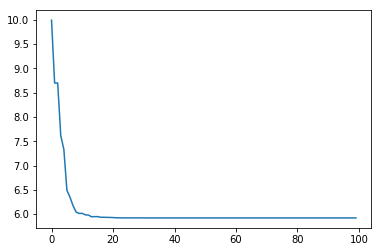

In [48]:
plt.plot(np.log(res))
plt.show()